In [ ]:
!pip install clodsa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 27.8 MB/s 
     |████████████████████████████████| 276 kB 61.9 MB/s 
  Created wheel for clodsa: filename=clodsa-1.2.47-py2.py3-none-any.whl size=74310 sha256=81daa0e7c2fb1c7f37506935e1a4ca69775ee163c48ffa285b4793f848b7810c
  Stored in directory: /root/.cache/pip/wheels/05/ff/0a/0e6e14c2a68d6869a010e979b8fd9d669aaeaa2d8b29de394f
  Created wheel for commentjson: filename=commentjson-0.9.0-py3-none-any.whl size=12092 sha256=279da62f25a53283159155715a5f8171690ccaa7b0f5ff0760366ae9067640be
  Stored in directory: /root/.cache/pip/wheels/eb/bb/07/25a7f0718ee3fe137384011b8e56070f91cf950ee6047c287f
  Created wheel for lark-parser: filename=lark_parser-0.7.8-py2.py3-none-any.whl size=62527 sha256=d6bff672b68dfacbc32deddd0aafa9f2b8174d0bf08e2e5e397baeb11f62572a
  Stored in directory: /root/.cache/pip/wheels/92/e3/af/1dc0fdca93232d700ac176af6554cf22b85f

In [1]:
from matplotlib import pyplot as plt
from clodsa.augmentors.augmentorFactory import createAugmentor
from clodsa.transformers.transformerFactory import transformerGenerator
from clodsa.techniques.techniqueFactory import createTechnique
import xml.etree.ElementTree as ET
import cv2
%matplotlib inline

2022-11-11 21:12:41.687206: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tareq/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-11-11 21:12:41.687236: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
INPUT_PATH = "/home/tareq/Downloads/CSE465/valimage_yolov5v3"

In [3]:
PROBLEM = "detection"
ANNOTATION_MODE = "yolo"
GENERATION_MODE = "linear"
OUTPUT_MODE = "yolo"
OUTPUT_PATH= "valimage_augment_yolov5vfinal"
augmentor = createAugmentor(PROBLEM,ANNOTATION_MODE,OUTPUT_MODE,GENERATION_MODE,INPUT_PATH,{"outputPath":OUTPUT_PATH})

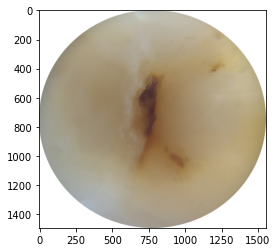

In [40]:
img = cv2.imread("/home/tareq/Downloads/CSE465/cavity_train_image/227.jpg")
# changing to the BGR format of OpenCV to RGB format for matplotlib
plt.imshow(img[:,:,::-1])

In [5]:
def boxesFromYOLO(imagePath,labelPath):
    image = cv2.imread(imagePath)
    (hI, wI) = image.shape[:2]
    lines = [line.rstrip('\n') for line in open(labelPath)]
    #if(len(objects)<1):
    #    raise Exception("The xml should contain at least one object")
    boxes = []
    if lines != ['']:
        for line in lines:
            components = line.split(" ")
            category = components[0]
            print(category)
            x  = int(float(components[1])*wI - float(components[3])*wI/2)
            y = int(float(components[2])*hI - float(components[4])*hI/2)
            h = int(float(components[4])*hI)
            w = int(float(components[3])*wI)
            boxes.append((category, (x, y, w, h)))
    return (image,boxes)

In [7]:
categoriesColors = {11: (255,0,0),14:(0,0,255)}

def showBoxes(image,boxes):
    cloneImg = image.copy()
    for box in boxes:
        if(len(box)==2):
            (category, (x, y, w, h))=box
        else:
            (category, (x, y, w, h),_)=box
        if int(category) in categoriesColors.keys():
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),categoriesColors[int(category)],5)
        else:
            cv2.rectangle(cloneImg,(x,y),(x+w,y+h),(0,255,0),5)
    plt.imshow(cloneImg[:,:,::-1])

In [12]:
transformer = transformerGenerator(PROBLEM)

In [13]:
vFlip = createTechnique("flip",{"flip":0})
augmentor.addTransformer(transformer(vFlip))

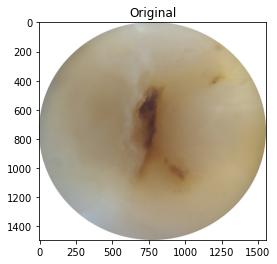

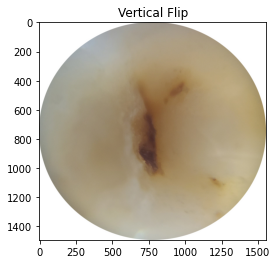

In [41]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
vFlipGenerator = transformer(vFlip)
vFlipImg,vFlipBoxes = vFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Vertical Flip")
showBoxes(vFlipImg,vFlipBoxes)

In [15]:
hFlip = createTechnique("flip",{"flip":1})
augmentor.addTransformer(transformer(hFlip))

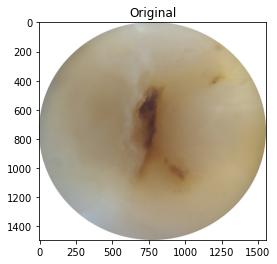

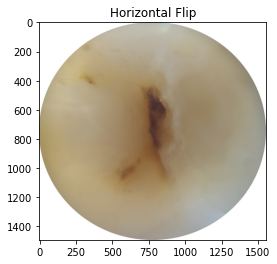

In [42]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hFlipGenerator = transformer(hFlip)
hFlipImg,hFlipBoxes = hFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Horizontal Flip")
showBoxes(hFlipImg,hFlipBoxes)

In [17]:
hvFlip = createTechnique("flip",{"flip":-1})
augmentor.addTransformer(transformer(hvFlip))

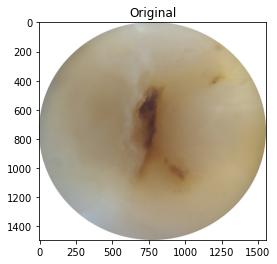

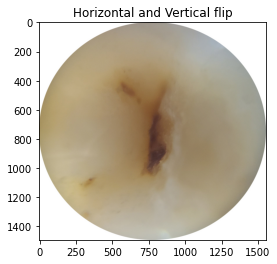

In [64]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hvFlipGenerator = transformer(hvFlip)
hvFlipImg,hvFlipBoxes = hvFlipGenerator.transform(img,boxes)
plt.figure()
plt.title("Horizontal and Vertical flip")
showBoxes(hvFlipImg,hvFlipBoxes)

In [19]:
rotate = createTechnique("rotate", {"angle" : 90})
augmentor.addTransformer(transformer(rotate))

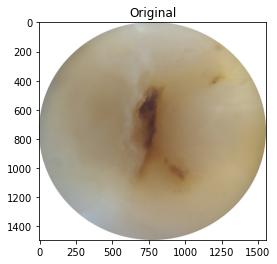

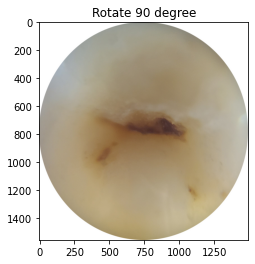

In [63]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
rotateGenerator = transformer(rotate)
rotateImg,rotateBoxes = rotateGenerator.transform(img,boxes)
plt.figure()
plt.title("Rotate 90 degree")
showBoxes(rotateImg,rotateBoxes)

In [21]:
avgBlur =  createTechnique("average_blurring", {"kernel" : 5})
augmentor.addTransformer(transformer(avgBlur))

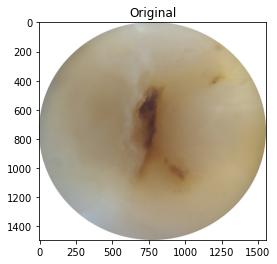

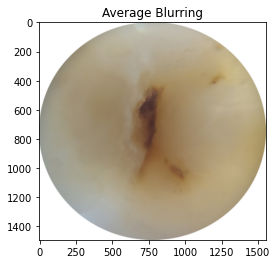

In [62]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
avgBlurGenerator = transformer(avgBlur)
avgBlurImg,avgBlurBoxes = avgBlurGenerator.transform(img,boxes)
plt.figure()
plt.title("Average Blurring")
showBoxes(avgBlurImg,avgBlurBoxes)

In [23]:
hue = createTechnique("raise_hue", {"power" : 0.9})
augmentor.addTransformer(transformer(hue))

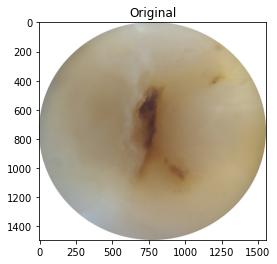

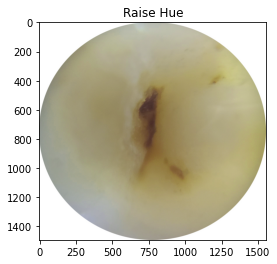

In [61]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(hue)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Raise Hue")
showBoxes(hueImg,hueBoxes)

In [25]:
none = createTechnique("none",{})
augmentor.addTransformer(transformer(none))

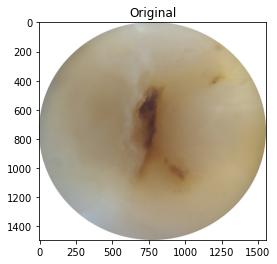

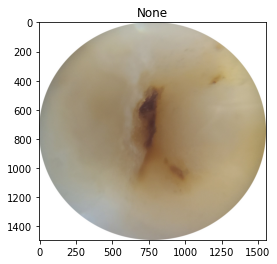

In [60]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
noneGenerator = transformer(none)
noneImg,noneBoxes = noneGenerator.transform(img,boxes)
plt.figure()
plt.title("None")
showBoxes(noneImg,noneBoxes)

In [28]:
eh=createTechnique("equalize_histogram",{})
augmentor.addTransformer(transformer(eh))

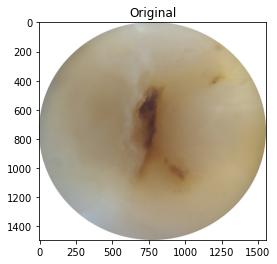

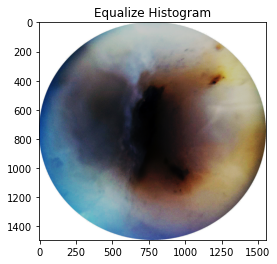

In [59]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(eh)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Equalize Histogram")
showBoxes(hueImg,hueBoxes)

In [30]:
invert=createTechnique("invert",{})
augmentor.addTransformer(transformer(invert))

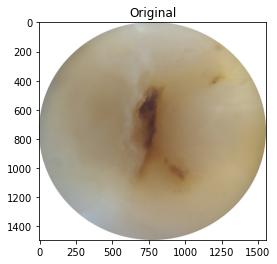

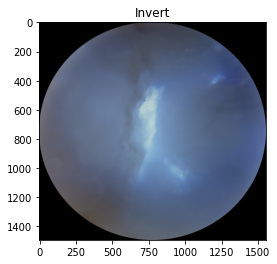

In [58]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(invert)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Invert")
showBoxes(hueImg,hueBoxes)

In [32]:
hsv=createTechnique("change_to_hsv",{})
augmentor.addTransformer(transformer(hsv))

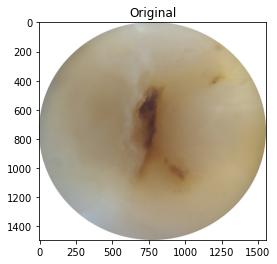

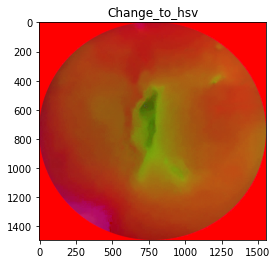

In [57]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(hsv)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Change_to_hsv")
showBoxes(hueImg,hueBoxes)

In [34]:
tr=createTechnique("translation", {"x":10,"y":10})
augmentor.addTransformer(transformer(tr))

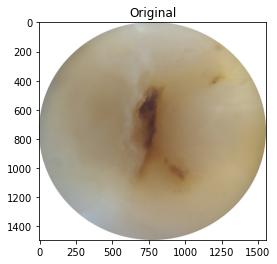

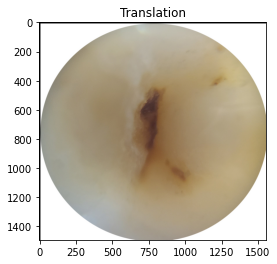

In [56]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(tr)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Translation")
showBoxes(hueImg,hueBoxes)

In [36]:
sh=createTechnique("sharpen", {})
augmentor.addTransformer(transformer(sh))

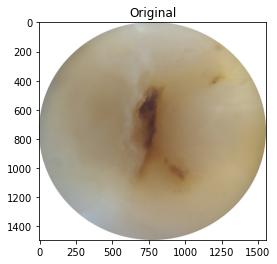

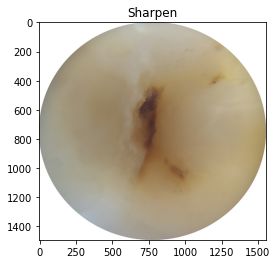

In [55]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(sh)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Sharpen")
showBoxes(hueImg,hueBoxes)

In [38]:
shear=createTechnique("shearing", {"a":0.5})
augmentor.addTransformer(transformer(shear))

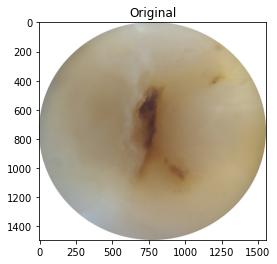

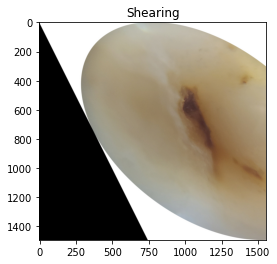

In [54]:
plt.figure()
plt.title("Original")
showBoxes(img,boxes)
hueGenerator = transformer(shear)
hueImg,hueBoxes = hueGenerator.transform(img,boxes)
plt.figure()
plt.title("Shearing")
showBoxes(hueImg,hueBoxes)

In [33]:
augmentor.applyAugmentation()

2022-08-09 01:20:40.032750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tareq/.local/lib/python3.10/site-packages/cv2/../../lib64:/home/tareq/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-08-09 01:20:40.032750: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/tareq/.local/lib/python3.10/site-packages/cv2/../../lib64:/home/tareq/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-08-09 01:20:40.032753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH

I am executing this notebook in Colaboratory, so I downloaded the generated files. 

In [25]:
print("Number of images in the folder")
!ls -1 augmented_images_yolov5v2/*.jpg | wc -l
print("Number of annotations in the folder")
!ls -1 augmented_images_yolov5v2/*.txt | wc -l

Number of images in the folder
1716
Number of annotations in the folder
1716


In [ ]:
!zip -r augmented_images_yolo.zip augmented_images_yolo
from google.colab import files
files.download('augmented_images_yolo.zip')

  adding: augmented_images_yolo/ (stored 0%)
  adding: augmented_images_yolo/192_6_193.txt (deflated 26%)
  adding: augmented_images_yolo/11_2_12.jpg (deflated 2%)
  adding: augmented_images_yolo/97_1_98.jpg (deflated 2%)
  adding: augmented_images_yolo/164_0_165.txt (deflated 35%)
  adding: augmented_images_yolo/39_2_40.txt (stored 0%)
  adding: augmented_images_yolo/129_0_130.txt (stored 0%)
  adding: augmented_images_yolo/57_3_58.txt (deflated 27%)
  adding: augmented_images_yolo/230_6_231.jpg (deflated 2%)
  adding: augmented_images_yolo/29_2_30.txt (deflated 27%)
  adding: augmented_images_yolo/22_1_23.txt (deflated 30%)
  adding: augmented_images_yolo/86_3_87.txt (stored 0%)
  adding: augmented_images_yolo/85_2_86.txt (stored 0%)
  adding: augmented_images_yolo/111_0_112.jpg (deflated 2%)
  adding: augmented_images_yolo/2_4_3.jpg (deflated 5%)
  adding: augmented_images_yolo/143_1_144.jpg (deflated 2%)
  adding: augmented_images_yolo/222_3_223.jpg (deflated 2%)
  adding: augmente

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp -r augmented_images_yolo /content/gdrive/MyDrive/CSE465